## FOOD PRODUCTION AND CONSUMPTION/SUPPLY IN AFRICA (2004-2013)

In [6]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [10]:
food_production =pd.read_csv("drive/My Drive/Africa food Production.csv")
food_production

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111
...,...,...,...,...
23105,Zimbabwe,Crustaceans,2009,0
23106,Zimbabwe,Crustaceans,2010,0
23107,Zimbabwe,Crustaceans,2011,0
23108,Zimbabwe,Crustaceans,2012,0


In [11]:
food_supply = pd.read_csv("drive/My Drive/Africa food supply.csv")
food_supply

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048
...,...,...,...
445,Zimbabwe,2009,2147
446,Zimbabwe,2010,2168
447,Zimbabwe,2011,2200
448,Zimbabwe,2012,2197


In [ ]:
food_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


In [ ]:
food_supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


In [ ]:
food_production['Year'] = food_production['Year'].apply(lambda x: pd.to_datetime(str(x), format='%Y'))

In [ ]:
#converting to date
food_supply['Year'] = food_supply['Year'].apply(lambda x: pd.to_datetime(str(x), format='%Y')) 

In [ ]:
food_production.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Country,Item,Year,Value
count,23110,23110,23110,23110.000000
unique,45,94,10,NaN
top,United Republic of Tanzania,Milk - Excluding Butter,2004-01-01 00:00:00,NaN
freq,790,450,2312,NaN
first,NaN,NaN,2004-01-01 00:00:00,NaN
last,NaN,NaN,2013-01-01 00:00:00,NaN
mean,NaN,NaN,NaN,327.785201
std,NaN,NaN,NaN,1607.940343
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,3.000000


In [ ]:
food_supply.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Country,Year,Value
count,450,450,450.000000
unique,45,10,NaN
top,Algeria,2004-01-01 00:00:00,NaN
freq,10,45,NaN
first,NaN,2004-01-01 00:00:00,NaN
last,NaN,2013-01-01 00:00:00,NaN
mean,NaN,NaN,2469.775556
std,NaN,NaN,379.140143
min,NaN,NaN,1781.000000
25%,NaN,NaN,2174.000000


## **Data** **Analysis**
  
  ### Food Production

In [16]:
#creating a new dataframe called country production containing average production value for each country
country_prod= pd.DataFrame(food_production.groupby('Country')['Value'].sum()).reset_index(inplace=False) 

In [17]:
country_prod

,Country,Value
0,Algeria,188650
1,Angola,195499
2,Benin,88072
3,Botswana,4808
4,Burkina Faso,100129
5,Cabo Verde,1658
6,Cameroon,197670
7,Central African Republic,24921
8,Chad,45078
9,Congo,25791


In [18]:
# average supply value for each country
country_supply= pd.DataFrame(food_supply.groupby('Country')['Value'].sum()).reset_index(inplace=False)
country_supply

,Country,Value
0,Algeria,31118
1,Angola,22556
2,Benin,25378
3,Botswana,22263
4,Burkina Faso,26072
5,Cabo Verde,25514
6,Cameroon,24603
7,Central African Republic,20719
8,Chad,20511
9,Congo,21530


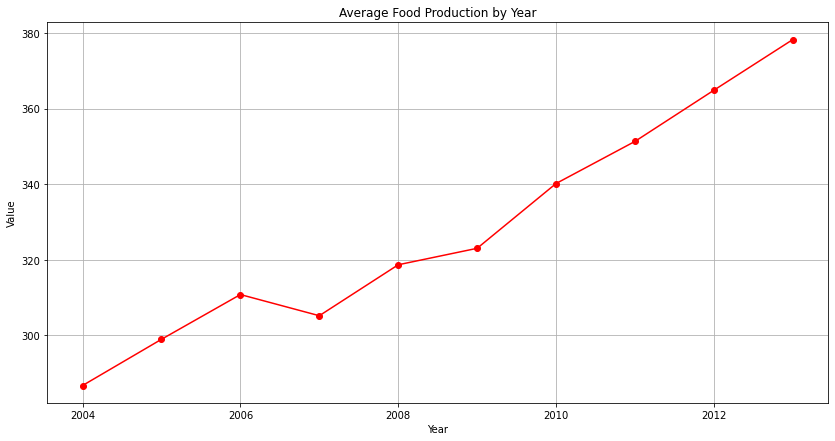

In [31]:
#plotting line chart to show trend of food production from 2004-2013
fig= plt.figure(figsize=(14, 7))
plt.plot(food_production.groupby('Year')['Value'].mean(), marker='o', color='red')
plt.title('Average Food Production by Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid()
plt.show()

From the line plot above, it can be seen that food production increased significantly from 2004 - 2013

In [ ]:
food_production_sorted_desc= food_production.sort_values('Value',ascending=False)

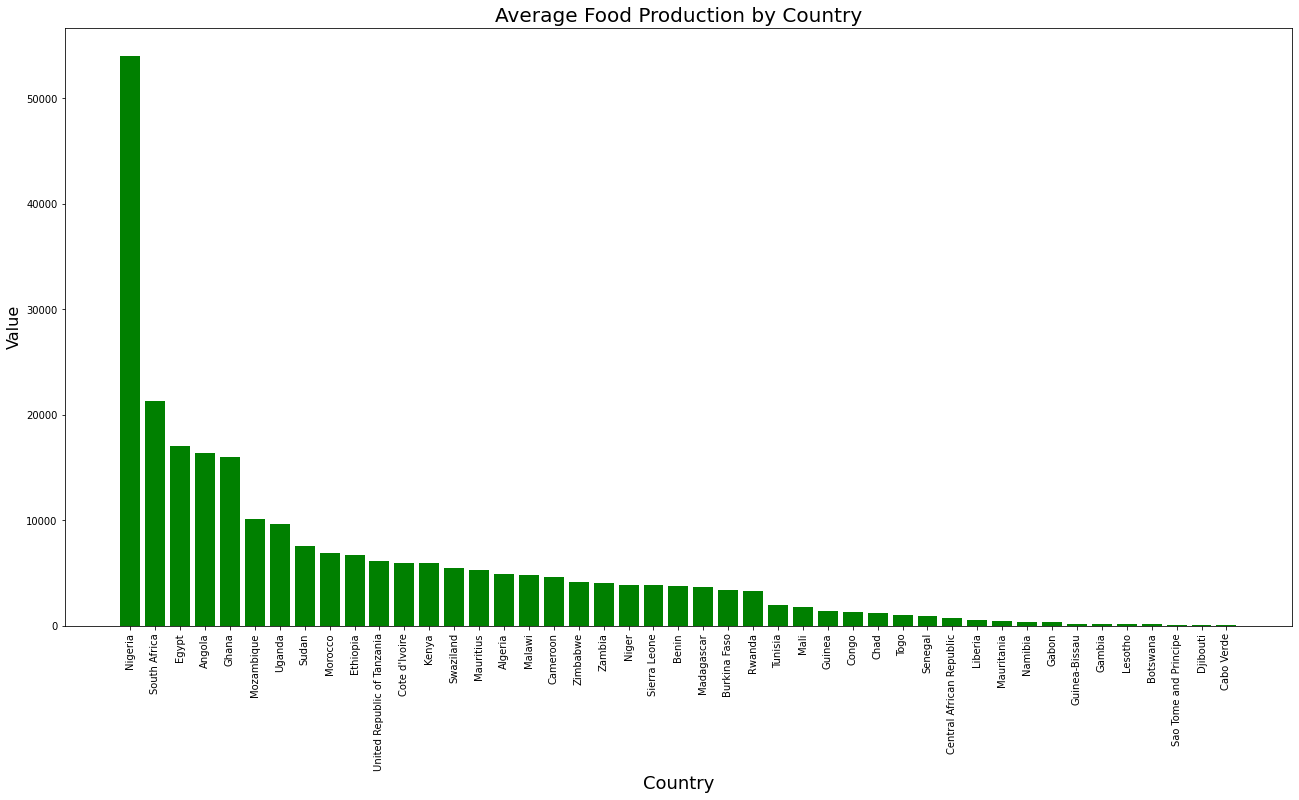

In [ ]:
#bar chart showing production value by country
fig= plt.figure(figsize=(22, 11))
plt.bar(food_production_sorted_desc['Country'],food_production_sorted_desc['Value'],color='green')
plt.title('Average Food Production by Country', fontsize= 20)
plt.xlabel('Country', fontsize= 18)
plt.ylabel('Value', fontsize= 16)
plt.xticks(rotation=90)
plt.show()
fig.savefig('Average Food Production by Country')

From the above bar plot, Nigeria is the highest producer of food.

## **Food** **items** **produced** in **Africa**

In [ ]:
item= pd.DataFrame(food_production.groupby('Item')['Value'].mean()).reset_index(inplace=False)

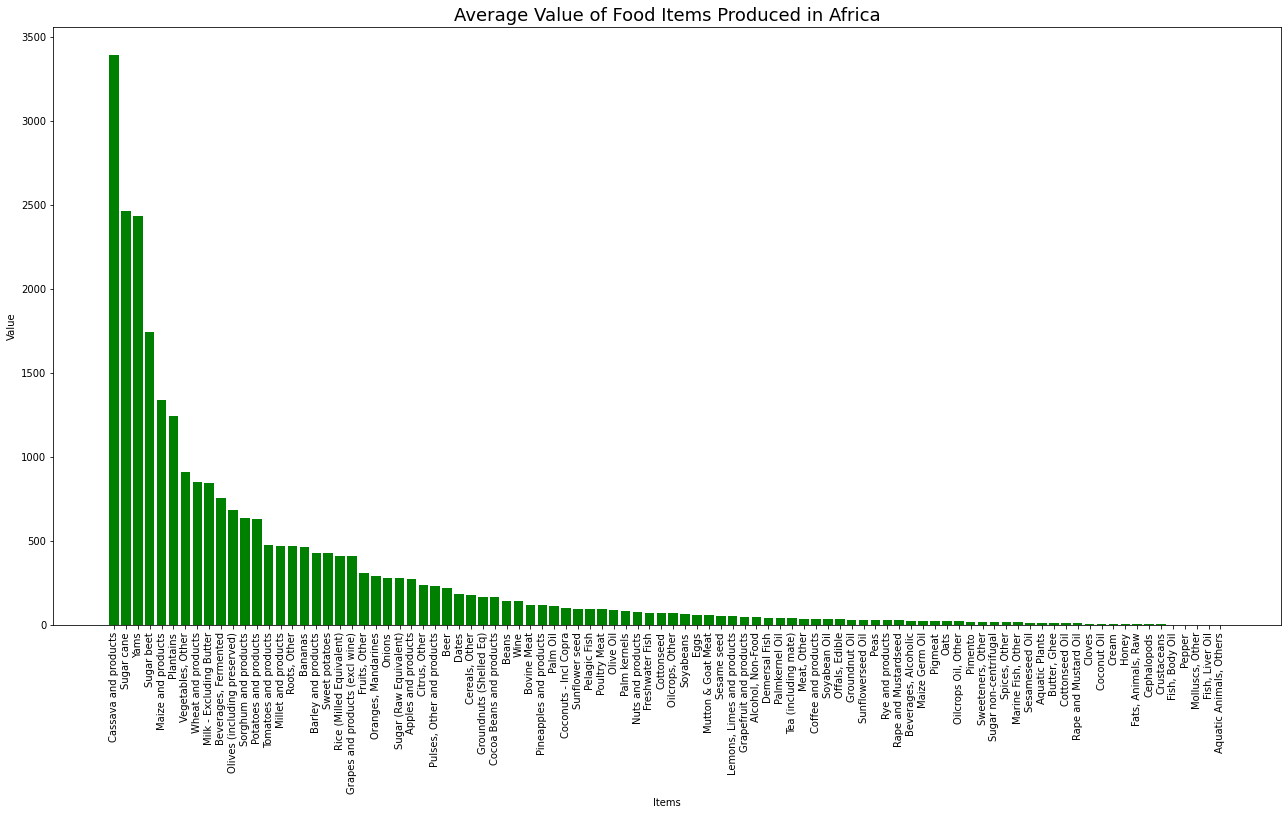

In [ ]:
#Plotting the average value of food items on a bar chat
item_sorted= item.sort_values('Value', ascending=False)
fig= plt.figure(figsize=(22,11))
plt.bar('Item', 'Value',data=item_sorted, color = 'green')
plt.xlabel("Items")
plt.ylabel("Value")
plt.xticks(rotation=90)
plt.title("Average Value of Food Items Produced in Africa", size=18)
plt.show()
fig.savefig('Food Produced in Africa.jpg')

The most produced item in Africa is Cassava and products.

##FOOD SUPPLY

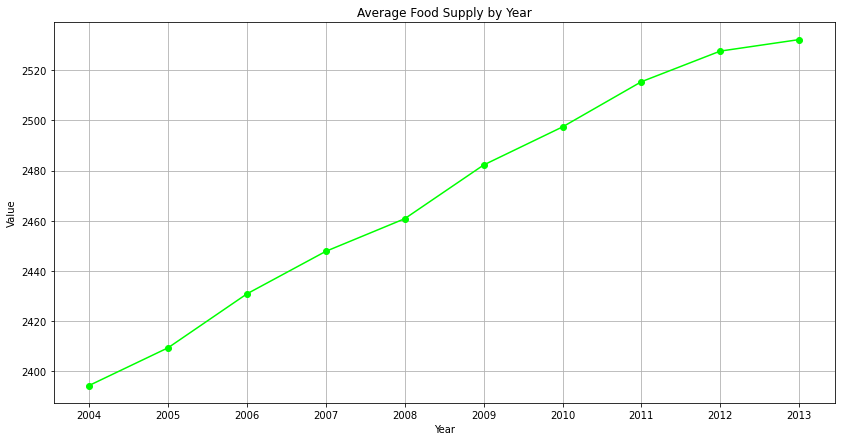

In [ ]:
#plotting line chart to show trend of food suuply from 2004-2013
fig= plt.figure(figsize=(14, 7))
plt.plot(food_supply.groupby('Year')['Value'].mean(), marker='o', color='lime')
plt.title('Average Food Supply by Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid()
plt.show()

In [ ]:
food_supply_sorted_desc= food_supply.sort_values('Value',ascending=False)

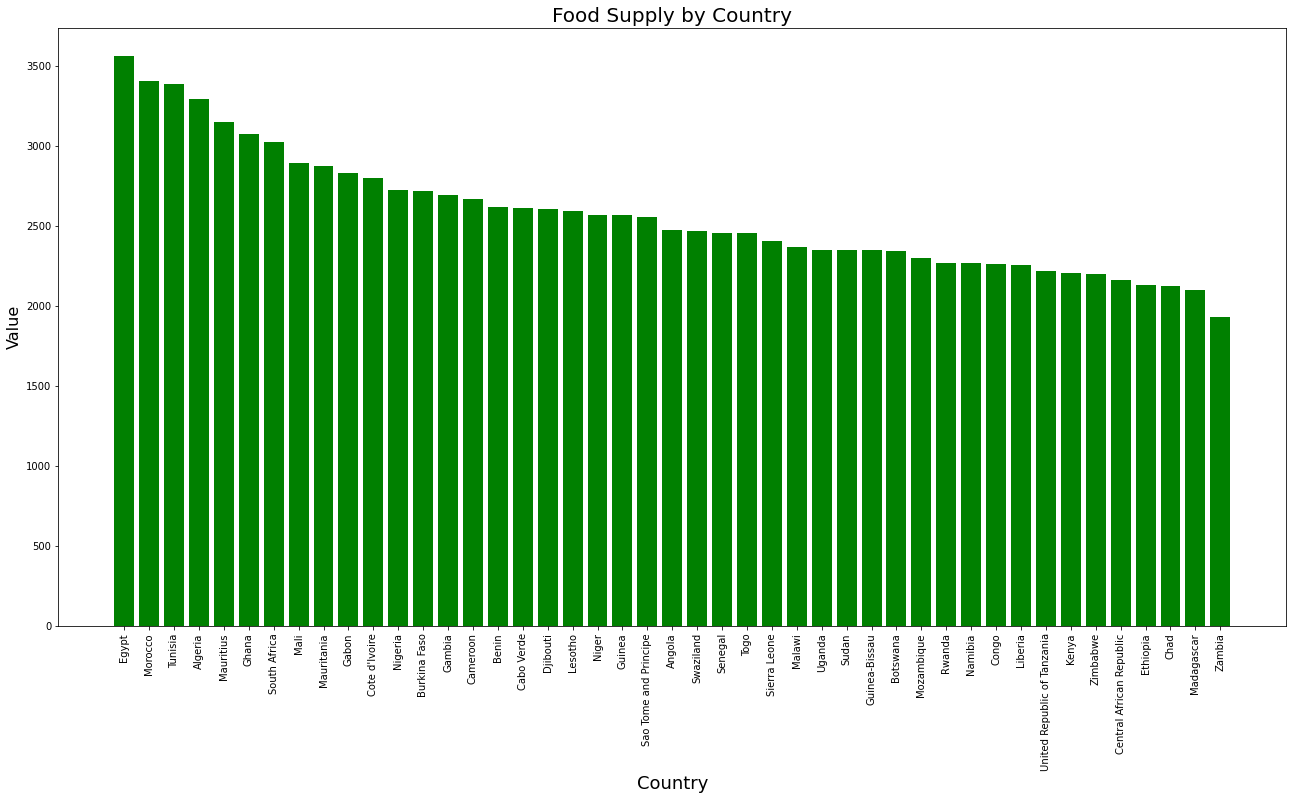

In [ ]:
#bar chart showing supply value by country
fig= plt.figure(figsize=(22, 11))
plt.bar(food_supply_sorted_desc['Country'],food_supply_sorted_desc['Value'],color='green')
plt.title('Food Supply by Country', fontsize= 20)
plt.xlabel('Country', fontsize= 18)
plt.ylabel('Value', fontsize= 16)
plt.xticks(rotation=90)
plt.show()
fig.savefig('Average Food Supply by Country')


The top 3 countries with the highest food consumption are Egypt, Morocco and Tunisia The

## The average quantity of food produced a year Vs quantity supplied/consumed a year

In [ ]:
#average food production for each year
food_production_avg=pd.DataFrame(food_production.groupby('Year')['Value'].mean()).reset_index(inplace= False)
food_production_avg

,Year,Value
0,2004-01-01,286.767301
1,2005-01-01,298.986592
2,2006-01-01,310.814014
3,2007-01-01,305.215830
4,2008-01-01,318.686851
5,2009-01-01,323.040657
6,2010-01-01,340.166955
7,2011-01-01,351.303633
8,2012-01-01,364.831816
9,2013-01-01,378.227568


In [ ]:
#average food supply for each year
food_supply_avg=pd.DataFrame(food_supply.groupby('Year')['Value'].mean()).reset_index(inplace= False)
food_supply_avg

,Year,Value
0,2004-01-01,2394.222222
1,2005-01-01,2409.288889
2,2006-01-01,2430.800000
3,2007-01-01,2447.755556
4,2008-01-01,2460.755556
5,2009-01-01,2482.222222
6,2010-01-01,2497.400000
7,2011-01-01,2515.422222
8,2012-01-01,2527.644444
9,2013-01-01,2532.244444


In [ ]:
#merging of the two dataframes
prod_supp_avg_df = pd.merge(food_production_avg, food_supply_avg, on='Year')
prod_supp_avg_df

,Year,Value_x,Value_y
0,2004-01-01,286.767301,2394.222222
1,2005-01-01,298.986592,2409.288889
2,2006-01-01,310.814014,2430.800000
3,2007-01-01,305.215830,2447.755556
4,2008-01-01,318.686851,2460.755556
5,2009-01-01,323.040657,2482.222222
6,2010-01-01,340.166955,2497.400000
7,2011-01-01,351.303633,2515.422222
8,2012-01-01,364.831816,2527.644444
9,2013-01-01,378.227568,2532.244444


In [ ]:
#renaming the columns 
prod_supp_avg_df.rename(columns= {'Value_x':'avg_food_produced', 'Value_y':'avg_food_supplied'}, inplace = True)

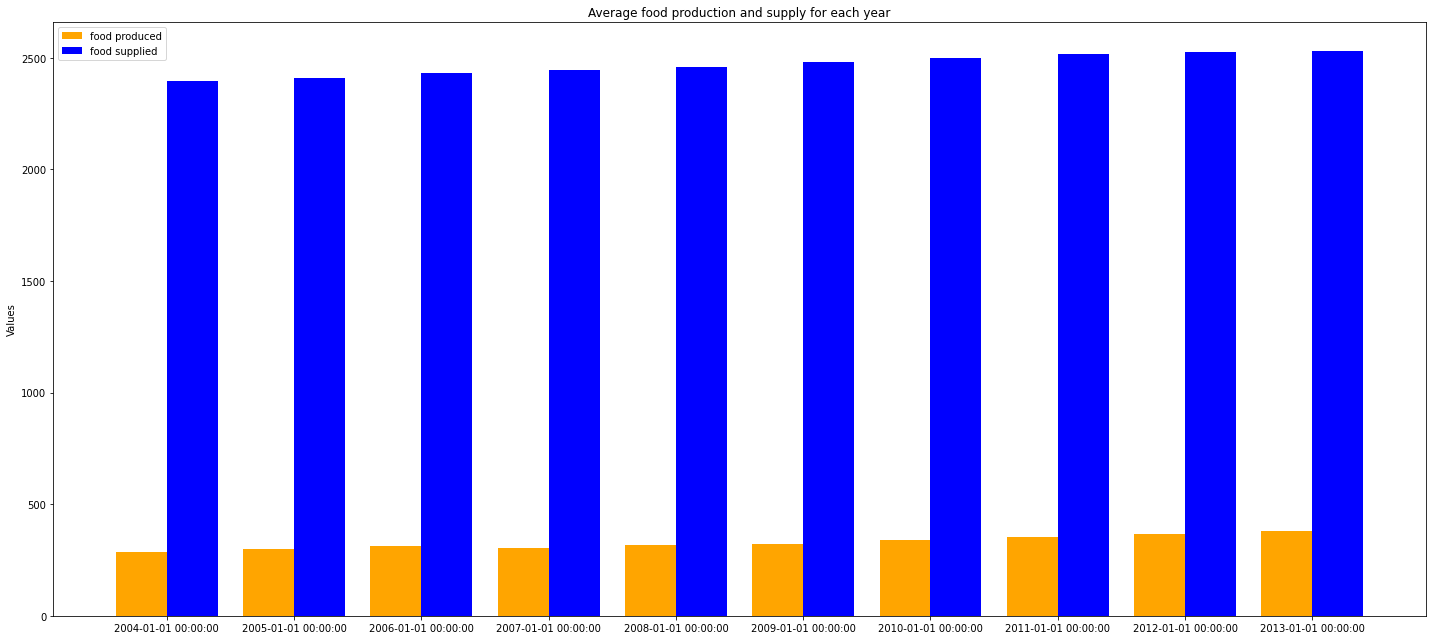

In [ ]:
fig= plt.figure(figsize=(20,9))
x = np.arange(len(prod_supp_avg_df['Year']))  # the year locations
width = 0.40  # the width of the bars

ax = fig.add_subplot()
rects1 = ax.bar(x - width/2, prod_supp_avg_df['avg_food_produced'], width, label='food produced', color='orange')
rects2 = ax.bar(x + width/2, prod_supp_avg_df['avg_food_supplied'], width, label='food supplied', color='blue')

ax.set_ylabel('Values')
ax.set_title('Average food production and supply for each year')
ax.set_xticks(x)
ax.set_xticklabels(prod_supp_avg_df['Year'])
ax.legend()



fig.tight_layout()

plt.show()
fig.savefig('Food Production vs Supply.jpg')

From the above figure, food consumption is higher than food production in Africa over the years. The question is 'How do African countries source food ?'

In [ ]:
food_production.nunique()

Country      45
Item         94
Year         10
Value      2134
dtype: int64

In [ ]:
food_supply.nunique()

Country     45
Year        10
Value      373
dtype: int64

In [ ]:
# grouping by country, year and item to get the total production per item
food_production_sum = food_production.groupby(['Country', 'Year', 'Item'])['Value'].sum()
food_production_sum

Country   Year        Item                 
Algeria   2004-01-01  Apples and products       165
                      Bananas                     0
                      Barley and products      1212
                      Beans                       2
                      Beer                      110
                                               ... 
Zimbabwe  2013-01-01  Tea (including mate)       19
                      Tomatoes and products      24
                      Vegetables, Other         203
                      Wheat and products         25
                      Wine                        2
Name: Value, Length: 23110, dtype: int64

In [ ]:
food_production_tot = pd.DataFrame(food_production.groupby(['Country', 'Year'], as_index= False)['Value'].sum())
food_production_tot

,Country,Year,Value
0,Algeria,2004-01-01,15536
1,Algeria,2005-01-01,15667
2,Algeria,2006-01-01,16417
3,Algeria,2007-01-01,14763
4,Algeria,2008-01-01,13841
...,...,...,...
445,Zimbabwe,2009-01-01,5754
446,Zimbabwe,2010-01-01,6777
447,Zimbabwe,2011-01-01,7551
448,Zimbabwe,2012-01-01,8173


In [ ]:
# Sorting by total values in descending order
foodprod_grouped = food_production_tot.sort_values(by = 'Value', ascending=False)

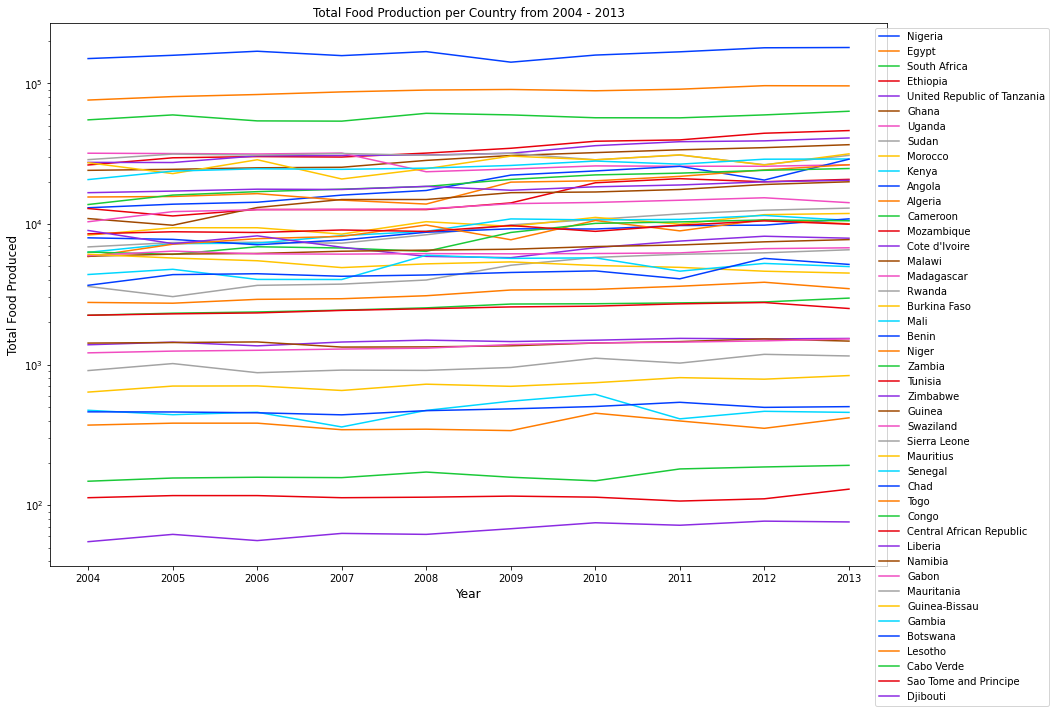

In [ ]:
# Visualising with a line chart the trend  from 2004 - 2013 of total items produced per country
plt.subplots(figsize=(15,10))
lineplt = sns.lineplot(x=foodprod_grouped['Year'], y= foodprod_grouped['Value'], hue=foodprod_grouped['Country'], palette = 'bright', data=foodprod_grouped, ci=None )
lineplt.set_yscale('log')
lineplt.legend(loc='upper right',bbox_to_anchor= (1.2, 1))

# Defining the title of the plot, xaxis and yaxis.
plt.title('Total Food Production per Country from 2004 - 2013')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Total Food Produced', fontsize = 12);

From the plot, Nigeria, Egypt and South Africa has consistently, respectively 

---

been the top 3 countries with the highest food production

In [ ]:
# grouping by country, year and item to get the total supply per item
food_supply_tot = pd.DataFrame(food_supply.groupby(['Country', 'Year'], as_index= False)['Value'].sum())
food_supply_tot

,Country,Year,Value
0,Algeria,2004-01-01,2987
1,Algeria,2005-01-01,2958
2,Algeria,2006-01-01,3047
3,Algeria,2007-01-01,3041
4,Algeria,2008-01-01,3048
...,...,...,...
445,Zimbabwe,2009-01-01,2147
446,Zimbabwe,2010-01-01,2168
447,Zimbabwe,2011-01-01,2200
448,Zimbabwe,2012-01-01,2197


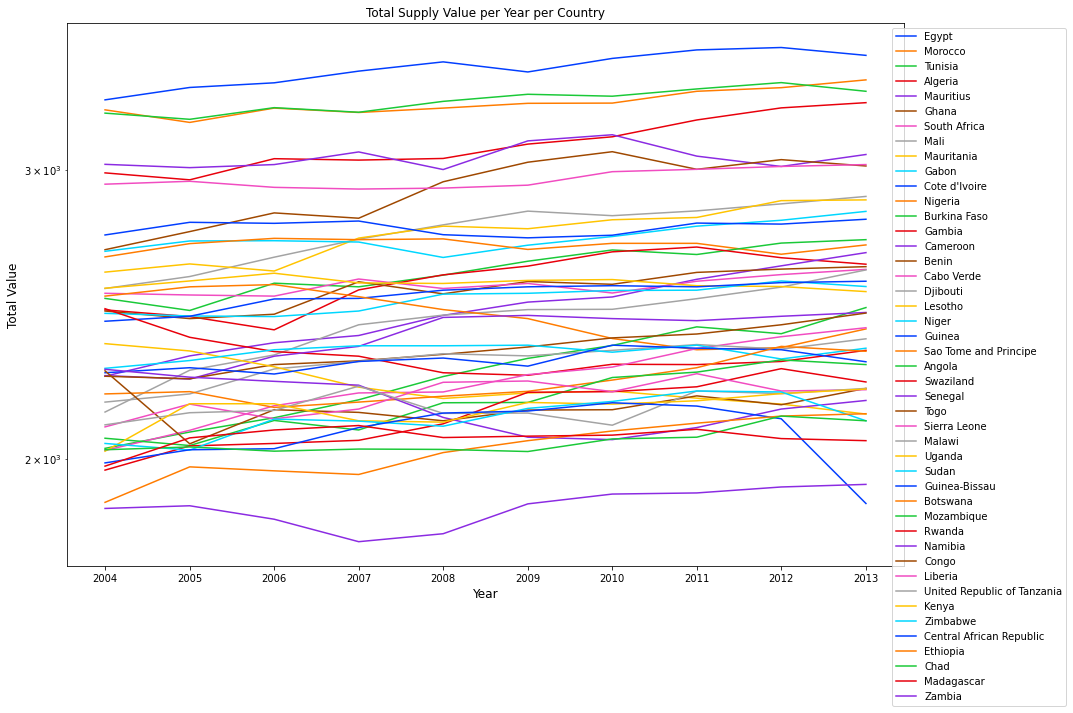

In [ ]:
# Sorting by total values supplied in descending order
foodsupply_grouped = food_supply_tot.sort_values(by='Value', ascending=False)

# Visualising from 2004 - 2013 of total items supplied to each country
plt.subplots(figsize=(15,10))
lineplt1 = sns.lineplot(x=foodsupply_grouped['Year'], y= foodsupply_grouped['Value'], hue=foodsupply_grouped['Country'], palette = 'bright', data=foodsupply_grouped, ci=None )
lineplt1.set_yscale('log')
lineplt1.legend(loc='upper right',bbox_to_anchor= (1.2, 1))

# Defining the title of the plot, xaxis and yaxis.
plt.title('Total Supply Value per Year per Country')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Total Value', fontsize = 12);

This visualisation shows us that Egypt, Morocco and Tunisia has the highest food supply per capita.
Only Egypt, out of the top 3 countries with the highest production made it to top 3 suppliers

In [ ]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

/bin/bash: conda: command not found
Folium installed and imported!


In [ ]:
#Importing required libraries
import numpy as np #library to handle data in a vectorized manner
import pandas as pd #library for data analysis

try:
    import geocoder #for the coordinates
except:
    !pip install geocoder
    import geocoder
    import requests
try:
    import folium #for map
except:
    !pip install folium
    import folium


import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans #importing kmeans clustering 

import warnings
warnings.filterwarnings('ignore')

print ('Done')

     |████████████████████████████████| 98 kB 3.7 MB/s 
Done


In [ ]:
! pip install geopy
print ('Successful!')

Successful!


In [ ]:
# Using gecoder to get the coordinates of Africa
g = geocoder.arcgis('Africa, Nigeria')
Africa_lat = g.latlng[0]
Africa_lng = g.latlng[1]
print ('The Latitude and Longitude of Africa are {} and {}'.format(Africa_lat, Africa_lng))

The Latitude and Longitude of Africa are -29.669719999999984 and 31.003630000000044


In [ ]:
food_production.head(40)

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004-01-01,2731
1,Algeria,Wheat and products,2005-01-01,2415
2,Algeria,Wheat and products,2006-01-01,2688
3,Algeria,Wheat and products,2007-01-01,2319
4,Algeria,Wheat and products,2008-01-01,1111
5,Algeria,Wheat and products,2009-01-01,2953
6,Algeria,Wheat and products,2010-01-01,2605
7,Algeria,Wheat and products,2011-01-01,2555
8,Algeria,Wheat and products,2012-01-01,3432
9,Algeria,Wheat and products,2013-01-01,3299


In [ ]:
#creating a new dataframe called country production... it contains the average production value for each country
country_prod= pd.DataFrame(food_production.groupby('Country')['Value'].sum()).reset_index(inplace=False) 

In [ ]:
country_prod

,Country,Value
0,Algeria,188650
1,Angola,195499
2,Benin,88072
3,Botswana,4808
4,Burkina Faso,100129
5,Cabo Verde,1658
6,Cameroon,197670
7,Central African Republic,24921
8,Chad,45078
9,Congo,25791


In [ ]:
def get_location(Country):
    g = geocoder.arcgis('{}, Africa'.format(Country))
    get_latlng = g.latlng
    return get_latlng

In [ ]:
coordinates = []
for a in country_prod['Country']. tolist():
    coordinates.append(get_location(a))
print (coordinates)

[[-32.373099999999965, 19.057660000000055], [-8.889059999999972, 13.203800000000058], [-23.84571999999997, 30.717290000000048], [-24.283329999999978, 30.550000000000068], [11.168960000000027, -4.311079999999947], [-33.92583999999994, 18.42322000000007], [-26.10881999999998, 28.05532000000005], [-26.030709814898163, 27.92925095441991], [5.402830000000051, -74.86717999999996], [-29.74186999999995, 30.874690000000044], [5.403120000000058, -3.9797099999999546], [11.588070000000073, 43.144870000000026], [30.04663000000005, 31.37603000000007], [9.09077000000002, 36.553750000000036], [5.402830000000051, -74.86717999999996], [5.402830000000051, -74.86717999999996], [-26.924409999999966, 27.47721000000007], [10.375290000000064, -9.32337999999993], [10.375290000000064, -9.32337999999993], [-31.165519999999958, 29.832480000000032], [-28.37072999999998, 29.203880000000026], [-28.95142999999996, 26.490710000000036], [-33.378409999999974, 27.344540000000052], [-24.589689999999962, 30.525630000000035

In [ ]:
coordinates_df = pd.DataFrame(coordinates, columns = ['Latitudes', 'Longitudes'])
coordinates_df.head()

,Latitudes,Longitudes
0,-32.37310,19.05766
1,-8.88906,13.20380
2,-23.84572,30.71729
3,-24.28333,30.55000
4,11.16896,-4.31108


In [ ]:
# Adding the coordinates to the dataframe
country_prod["Latitudes"] = coordinates_df["Latitudes"]
country_prod["Longitudes"] = coordinates_df["Longitudes"]
country_prod.head()

,Country,Value,Latitudes,Longitudes
0,Algeria,188650,-32.37310,19.05766
1,Angola,195499,-8.88906,13.20380
2,Benin,88072,-23.84572,30.71729
3,Botswana,4808,-24.28333,30.55000
4,Burkina Faso,100129,11.16896,-4.31108


In [ ]:
#Creating the map for the Neighbourhoods 
Africa_map = folium.Map(location=[Africa_lat, Africa_lng],zoom_start=14)

#adding markers to the map for the Neighbourhoods
folium.Marker([Africa_lat, Africa_lng], popup='Africa', tooltip="Click to view").add_to(Africa_map)


#looping through the cities
for latitude,longitude, name in zip(country_prod["Latitudes"], country_prod["Longitudes"], country_prod["Country"]):
    folium.CircleMarker([latitude, longitude],
        radius=6,
        color='red',
        popup=name,
        fill=True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(Africa_map)
Africa_map

From the line plot above, it can be seen that food production increased significantly from 2004 - 2013

In [ ]:
import plotly.express as px
import plotly.graph_objects as go


# This **is** **Formatted** **as** **Code** 
## finding outliers

In [ ]:
#Creating a boxplot for the food production data 
fig = go.Figure()
fig.add_trace(go.Box(y = foodprod_grouped.Value,
                     x= foodprod_grouped.Year,
                     boxpoints = "outliers",
                     boxmean = True,
                     marker_color='rgb(9,56,125)',
                     line_color='rgb(9,56,125)'))
fig.update_layout(title_text="Food Production per Country from 2004-2013", yaxis_title= "Total Food Produced", xaxis_title = "Year")
fig.show()

In [ ]:
foodprod_grouped

,Country,Year,Value
319,Nigeria,2013-01-01,179631
318,Nigeria,2012-01-01,178816
312,Nigeria,2006-01-01,168987
314,Nigeria,2008-01-01,167935
317,Nigeria,2011-01-01,167403
...,...,...,...
113,Djibouti,2007-01-01,63
114,Djibouti,2008-01-01,62
111,Djibouti,2005-01-01,62
112,Djibouti,2006-01-01,56


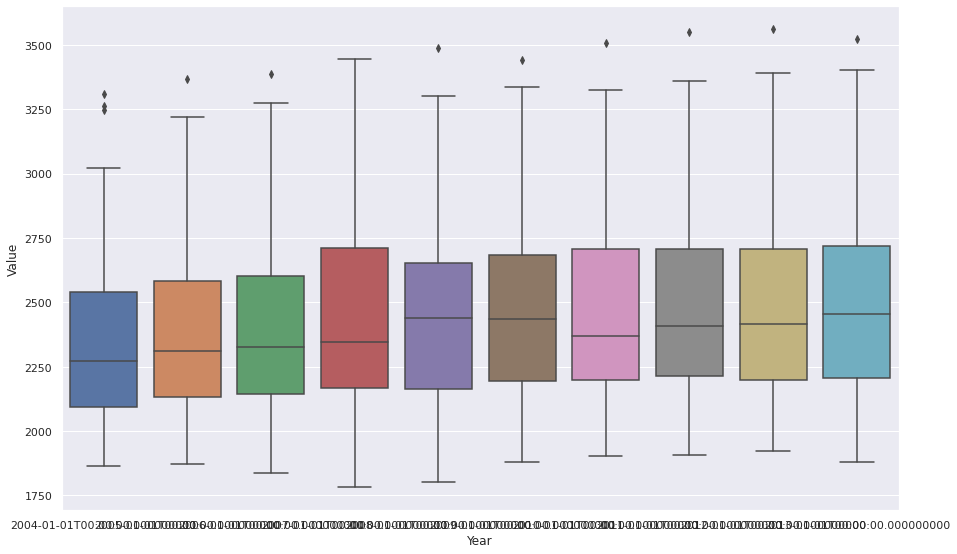

In [ ]:
#box plot for food supply dataset
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(15,9.27)}) 
sns_plot = sns.boxplot(x = 'Year', y = 'Value', data = food_supply)
fig = sns_plot.get_figure()
plt.show()
fig.savefig('supply_outliers.jpg')


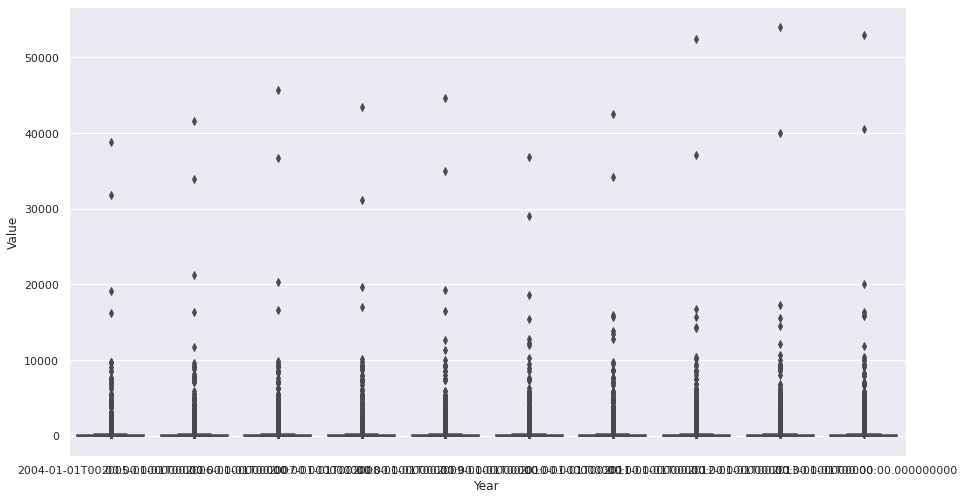

In [ ]:
#box plot for food supply dataset
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(15,8.27)}) 
sns_plot = sns.boxplot(x = 'Year', y = 'Value', data = food_production)
fig = sns_plot.get_figure()
plt.show()
fig.savefig('produce_outliers.jpg')


From the above figure, there are many outliers in the data

In [ ]:
#25th percentile Q1
Q1= np.percentile(food_production['Value'],25)
print(f"The Q1 value for food production data is {Q1}")

#75th percentile Q3
Q3= np.percentile(food_production['Value'],75)
print(f"The Q3 value for food production data is {Q3}")

#Calculating the IQR
IQR= Q3-Q1
print(f"The IQR for food production data is {IQR}")

The Q1 value for food production data is 3.0
The Q3 value for food production data is 108.0
The IQR for food production data is 105.0


In [ ]:
#calculating lower bound and upper bound values
lower_bound= Q1 - (1.5 * IQR)
print(f"lower_bound value for food production data is {lower_bound}")

upper_bound= Q3 + (1.5 * IQR)
print(f"upper_bound value for food production data is {upper_bound}")

lower_bound value for food production data is -154.5
upper_bound value for food production data is 265.5


From the plot, Nigeria, Egypt and South Africa are the top 3 countries with the highest food production

We saw earlier that the most produced item is cassava, It would be important to note the countries that produce the most cassava.

In [ ]:
cassava_production = food_production[(food_production["Item"] == "Cassava")]

In [ ]:
#top 10 countries
cassava_production = cassava_production.groupby('Country')['Value'].mean()
cassava_production = cassava_production.to_frame(name='value').reset_index()
cassava_production_sort = cassava_production.sort_values(['value'], ascending=[False])
cassava_production_sort = cassava_production_sort.head(10)


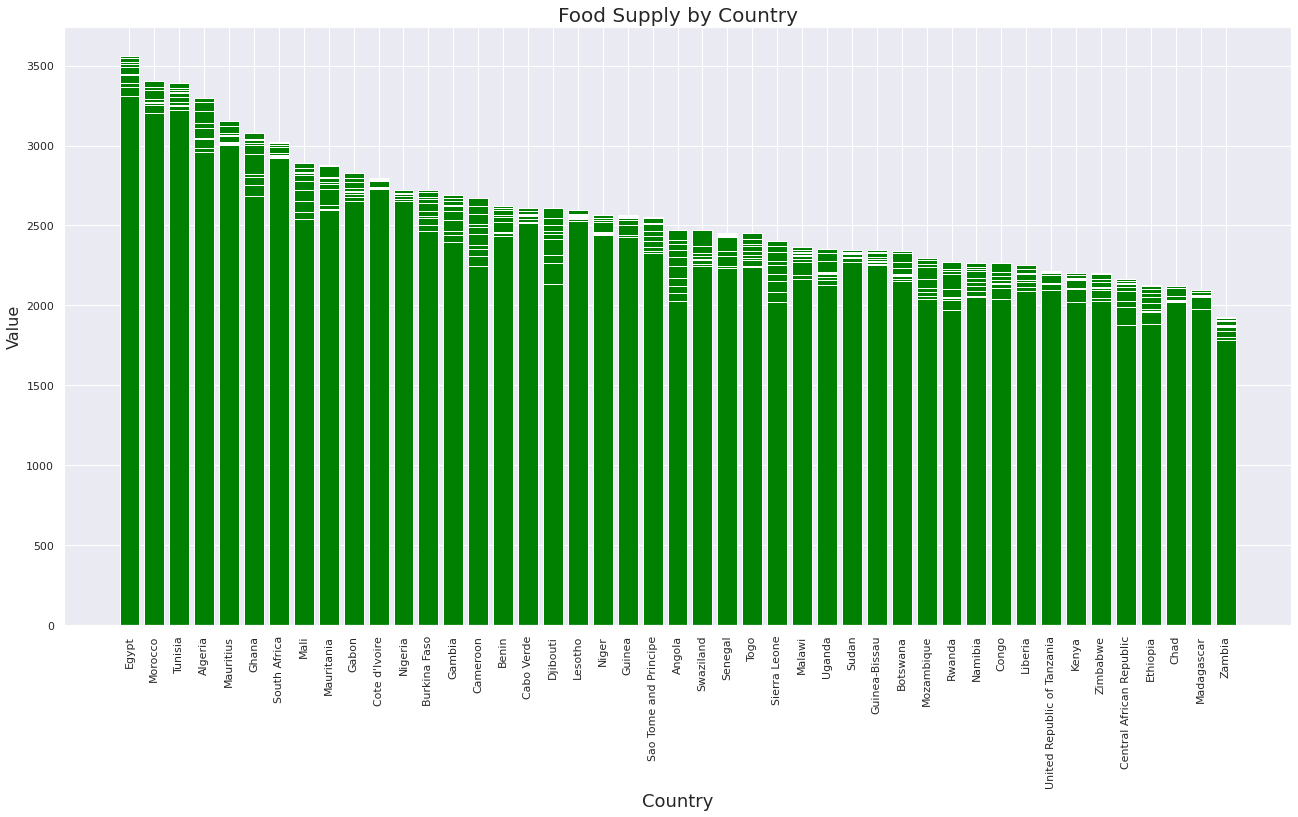

In [ ]:
fig= plt.figure(figsize=(22, 11))
plt.bar(food_supply_sorted_desc['Country'],food_supply_sorted_desc['Value'],color='green')
plt.title('Food Supply by Country', fontsize= 20)
plt.xlabel('Country', fontsize= 18)
plt.ylabel('Value', fontsize= 16)
plt.xticks(rotation=90)
plt.show()
fig.savefig('Average Food Supply by Country')


In [19]:
#scraping population data from wikipedia
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_African_countries_by_population')[1]
df

,Countries(or dependent territory),Officialfigure(whereavailable),Date oflast figure,Source
0,Nigeria,218056384,2022,the world[3]
1,Ethiopia,128004992,2018,UN population projections[4][5]
2,Egypt,99281168,"December 8, 2020",National population clock
3,Democratic Republic of the Congo,94420023,"July 1, 2020",National annual projection
4,Tanzania,62757193,2020,Worldometers
5,South Africa,60591903,2021,Official estimate
6,Kenya,55845793,2019,Worldometers
7,Uganda,48325541,2021,National annual projection
8,Sudan,45647651,"January 25, 2020",Official population clock
9,Algeria,45225962,2021,Official estimate


In [20]:
#cleaning the dataset
pop_df = df[['Countries(or dependent territory)', 'Officialfigure(whereavailable)']]
pop_df.rename(columns = {'Countries(or dependent territory)':'Country',  'Officialfigure(whereavailable)':'Population'}, inplace= 'True')
pop_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country,Population
0,Nigeria,218056384
1,Ethiopia,128004992
2,Egypt,99281168
3,Democratic Republic of the Congo,94420023
4,Tanzania,62757193
5,South Africa,60591903
6,Kenya,55845793
7,Uganda,48325541
8,Sudan,45647651
9,Algeria,45225962


In [21]:
#cleaning the dataset
pop_df = df[['Countries(or dependent territory)', 'Officialfigure(whereavailable)']]
pop_df.rename(columns = {'Countries(or dependent territory)':'Country',  'Officialfigure(whereavailable)':'Population'}, inplace= 'True')
pop_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country,Population
0,Nigeria,218056384
1,Ethiopia,128004992
2,Egypt,99281168
3,Democratic Republic of the Congo,94420023
4,Tanzania,62757193
5,South Africa,60591903
6,Kenya,55845793
7,Uganda,48325541
8,Sudan,45647651
9,Algeria,45225962


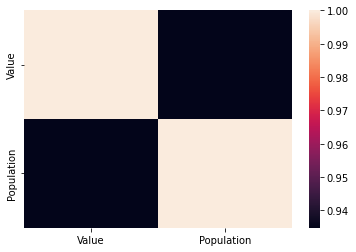

In [29]:
sns.heatmap(main_dff.corr())
plt.show()

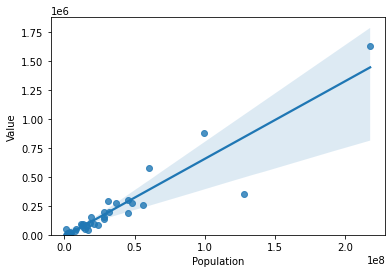

In [33]:
sns.regplot(x= 'Population', y= 'Value', data=main_dff)
plt.ylim(0,)
plt.savefig('regression plot for food production.png')

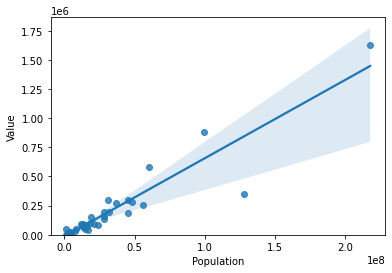

In [30]:
sns.regplot(x= 'Population', y= 'Value', data=main_dff)
plt.ylim(0,)
plt.savefig('regression plot for food supply.png')


In [34]:
#merging the data set with food supply data 
main_dff= pd.merge(country_prod, pop_df, on= 'Country')
main_dff

,Country,Value,Population
0,Algeria,188650,45225962
1,Angola,195499,32097671
2,Benin,88072,12506347
3,Botswana,4808,2410338
4,Burkina Faso,100129,18450494
5,Cameroon,197670,28524175
6,Central African Republic,24921,3859139
7,Chad,45078,16818391
8,Djibouti,666,976107
9,Egypt,877498,99281168


#Q1: Which country produced the highest amount of oats in 2010

In [35]:

oat_2010 = food_production[(food_production['Item'] == 'Oats')]
oatts_2010 = oat_2010[(oat_2010)['Year']== 2010]
oatts_2010

,Country,Item,Year,Value
46,Algeria,Oats,2010,88
6406,Ethiopia,Oats,2010,48
7746,Ghana,Oats,2010,0
9286,Kenya,Oats,2010,3
10026,Lesotho,Oats,2010,0
13186,Morocco,Oats,2010,37
17816,South Africa,Oats,2010,34
20056,Tunisia,Oats,2010,2
22516,Zimbabwe,Oats,2010,1


Algeria produced the highest amount of oats in 2010

#Q2: which three countries had the lowest food supply betweenn 2004 and 2006

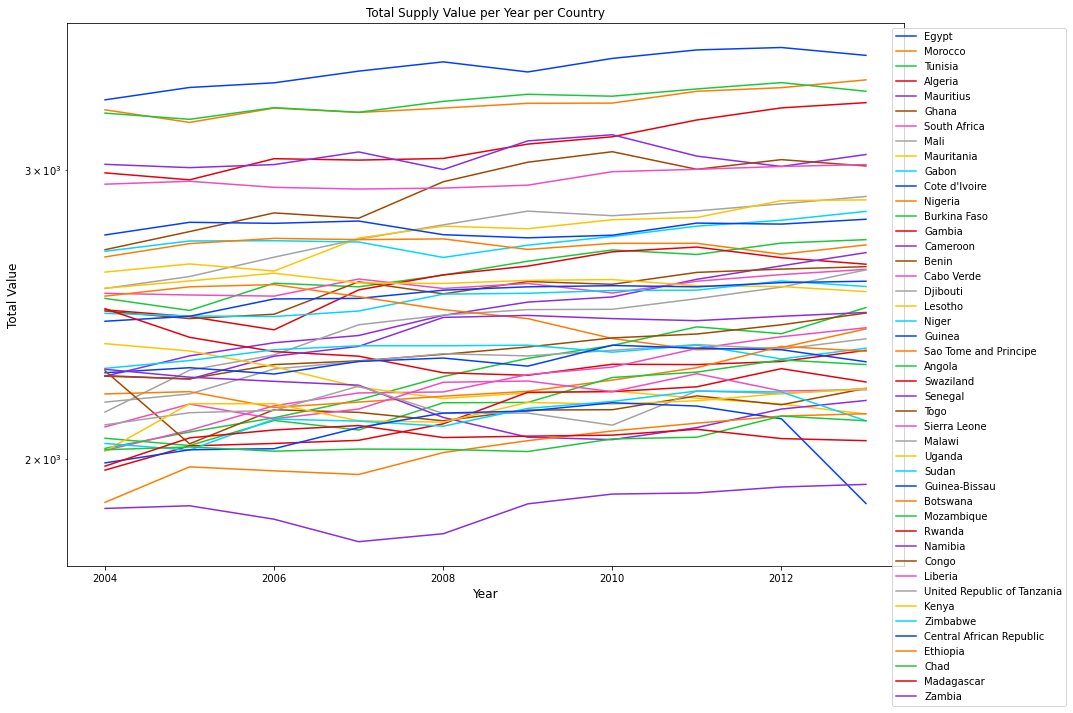

In [36]:

foodsupply_tot = pd.DataFrame(food_supply.groupby(['Country', 'Year'], as_index = False).sum())

# Sorting by total values supplied in descending order
foodsupply_grouped = foodsupply_tot.sort_values(by='Value', ascending=False)

# Visualising with a line chart the trend  from 2004 - 2013 of total items supplied to each country
plt.subplots(figsize=(15,10))
lineplt1 = sns.lineplot(x=foodsupply_grouped['Year'], y= foodsupply_grouped['Value'], hue=foodsupply_grouped['Country'], palette = 'bright', data=foodsupply_grouped, ci=None )
lineplt1.set_yscale('log')
lineplt1.legend(loc='upper right',bbox_to_anchor= (1.2, 1))

# Defining the title of the plot, xaxis and yaxis.
plt.title('Total Supply Value per Year per Country')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Total Value', fontsize = 12);


The 3 countries with the lowest food supply are Zambia, Ethopia and Central African Republic